# Prajwal S S Reddy

## The Spark foundation GRIP

## Stock Market Prediction using Numerical and Textual Analysis

In [114]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# data loading
stock_prices = pd.read_csv("/content/drive/MyDrive/Stock_price_analyser/data/AAPL.csv")
headlines = pd.read_csv("/content/drive/MyDrive/Stock_price_analyser/data/india-news-headlines.csv")

In [117]:
stock_prices.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,61.625000,62.180000,59.782501,60.227501,58.814816,176218400
1,2020-04-02,60.084999,61.287498,59.224998,61.232498,59.796238,165934000
2,2020-04-03,60.700001,61.424999,59.742500,60.352501,58.936882,129880000
3,2020-04-06,62.724998,65.777496,62.345001,65.617500,64.078400,201820400
4,2020-04-07,67.699997,67.925003,64.750000,64.857498,63.336208,202887200
5,2020-04-08,65.684998,66.842499,65.307503,66.517502,64.957275,168895200


In [118]:
headlines.head(6)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio


### Data Cleaning

In [119]:
#Checking for null values
stock_prices.isnull().sum() , headlines.isnull().sum()
# stock price dataframe has 2 null values and headlines has 0 null values

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
 publish_date         0
 headline_category    0
 headline_text        0
 dtype: int64)

In [120]:
# drop null values , because count is very less
stock_prices.dropna(inplace=True)

In [121]:
#Checking for null values again
stock_prices.isnull().sum() , headlines.isnull().sum()
# there is no null values

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
 publish_date         0
 headline_category    0
 headline_text        0
 dtype: int64)

In [122]:
#checking stock_price datafrome
stock_prices.info()
#date is in the dtype of object , need to be converted to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


In [123]:
# cleaning stock price dataframe
stock_prices.drop_duplicates(inplace = True)

#convert object date column into datetime() dtype
stock_prices["Date"]=pd.to_datetime(stock_prices["Date"])

#Dropping extra columns in stock_price dataframe
stock_prices.drop(['Adj Close'], axis=1, inplace=True)

#dropping index column and setting date column as index column
stock_prices.set_index('Date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_prices = stock_prices.sort_index(ascending=True, axis=0)
stock_prices

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-01,61.625000,62.180000,59.782501,60.227501,176218400
2020-04-02,60.084999,61.287498,59.224998,61.232498,165934000
2020-04-03,60.700001,61.424999,59.742500,60.352501,129880000
2020-04-06,62.724998,65.777496,62.345001,65.617500,201820400
2020-04-07,67.699997,67.925003,64.750000,64.857498,202887200
...,...,...,...,...,...
2022-03-24,171.059998,174.139999,170.210007,174.070007,90131400
2022-03-25,173.880005,175.279999,172.750000,174.720001,80546200
2022-03-28,172.169998,175.729996,172.000000,175.600006,90371900


In [124]:
# cleaning headlines dataframe
headlines.drop_duplicates(inplace = True)

#convert object date column into datetime() dtype
headlines['publish_date'] = headlines['publish_date'].astype(str)
headlines['publish_date'] = headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
headlines['publish_date'] = pd.to_datetime(headlines['publish_date']).dt.normalize()

#Dropping extra columns in headlines dataframe
headlines.drop(['headline_category'], axis=1, inplace=True)

# grouping the news headlines according to 'Date'
headlines = headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting column 'Date' as the index column
headlines.set_index('publish_date', inplace= True)

# sorting the data according to the index i.e 'Date'
headlines = headlines.sort_index(ascending=True, axis=0)
headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2022-03-27,Playing a dead man in Body God meant sitting i...
2022-03-28,As fashion becomes democratic; demand for styl...
2022-03-29,Bobby Deol: Like my dad; I hope to be working ...


In [125]:
# concatenating the datasets stock_prices and headlines
stock_data = pd.concat([stock_prices, headlines], axis=1)

# dropping the null values if any
stock_data.dropna(axis=0, inplace=True)

stock_data

,Open,High,Low,Close,Volume,headline_text
2020-04-01,61.625000,62.180000,59.782501,60.227501,176218400.0,"Distribution of free ration from April 1,april..."
2020-04-02,60.084999,61.287498,59.224998,61.232498,165934000.0,"Govt bldgs earmarkedfor Covid contingencies,Co..."
2020-04-03,60.700001,61.424999,59.742500,60.352501,129880000.0,Ranchi neighbourhoods go into shell after 1 te...
2020-04-06,62.724998,65.777496,62.345001,65.617500,201820400.0,Losing sleep over office politics? Here's how ...
2020-04-07,67.699997,67.925003,64.750000,64.857498,202887200.0,My teen seems to be extremely upset being lock...
...,...,...,...,...,...,...
2022-03-24,171.059998,174.139999,170.210007,174.070007,90131400.0,This all-woman rap group is claiming their spa...
2022-03-25,173.880005,175.279999,172.750000,174.720001,80546200.0,Speeding up; shortcuts and tackling unruly cus...
2022-03-28,172.169998,175.729996,172.000000,175.600006,90371900.0,As fashion becomes democratic; demand for styl...
2022-03-29,176.690002,179.009995,176.339996,178.960007,100589400.0,Bobby Deol: Like my dad; I hope to be working ...


### Sentimate analysis

In [126]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [127]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [128]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])

stock_data.head()

,Open,High,Low,Close,Volume,headline_text,compound,negative,neutral,positive
2020-04-01,61.625000,62.180000,59.782501,60.227501,176218400.0,"Distribution of free ration from April 1,april...",-0.9989,0.112,0.799,0.089
2020-04-02,60.084999,61.287498,59.224998,61.232498,165934000.0,"Govt bldgs earmarkedfor Covid contingencies,Co...",-0.9990,0.118,0.792,0.091
2020-04-03,60.700001,61.424999,59.742500,60.352501,129880000.0,Ranchi neighbourhoods go into shell after 1 te...,-0.9985,0.105,0.814,0.082
2020-04-06,62.724998,65.777496,62.345001,65.617500,201820400.0,Losing sleep over office politics? Here's how ...,-0.9983,0.117,0.788,0.095
2020-04-07,67.699997,67.925003,64.750000,64.857498,202887200.0,My teen seems to be extremely upset being lock...,-0.9995,0.129,0.778,0.093


In [129]:
#dropping headline_text column
stock_data = stock_data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2020-04-01,60.227501,-0.9989,0.112,0.799,0.089,61.625000,62.180000,59.782501,176218400.0
2020-04-02,61.232498,-0.9990,0.118,0.792,0.091,60.084999,61.287498,59.224998,165934000.0
2020-04-03,60.352501,-0.9985,0.105,0.814,0.082,60.700001,61.424999,59.742500,129880000.0
2020-04-06,65.617500,-0.9983,0.117,0.788,0.095,62.724998,65.777496,62.345001,201820400.0
2020-04-07,64.857498,-0.9995,0.129,0.778,0.093,67.699997,67.925003,64.750000,202887200.0


In [130]:
#transfering stock data csv file to drive
stock_data.to_csv('/content/drive/MyDrive/Stock_price_analyser/data/stock_datafinal.csv')

In [131]:
# Setting Date column as index column
stock_data.index.name = "Date"

In [132]:
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2020-04-01,60.227501,-0.9989,0.112,0.799,0.089,61.625000,62.180000,59.782501,176218400.0
2020-04-02,61.232498,-0.9990,0.118,0.792,0.091,60.084999,61.287498,59.224998,165934000.0
2020-04-03,60.352501,-0.9985,0.105,0.814,0.082,60.700001,61.424999,59.742500,129880000.0
2020-04-06,65.617500,-0.9983,0.117,0.788,0.095,62.724998,65.777496,62.345001,201820400.0
2020-04-07,64.857498,-0.9995,0.129,0.778,0.093,67.699997,67.925003,64.750000,202887200.0


#### Data checking

In [133]:
stock_data.isna().sum()

Close       0
compound    0
negative    0
neutral     0
positive    0
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [134]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2020-04-01 to 2022-03-30
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     504 non-null    float64
 1   compound  504 non-null    float64
 2   negative  504 non-null    float64
 3   neutral   504 non-null    float64
 4   positive  504 non-null    float64
 5   Open      504 non-null    float64
 6   High      504 non-null    float64
 7   Low       504 non-null    float64
 8   Volume    504 non-null    float64
dtypes: float64(9)
memory usage: 39.4 KB


In [135]:
#stock_data statistics
stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,129.651037,-0.979624,0.126571,0.796591,0.076829,129.555928,131.095109,128.050511,1.116192e+08
std,28.142054,0.197933,0.017403,0.022412,0.011454,28.106693,28.373050,27.869257,4.781271e+07
min,60.227501,-0.999900,0.076000,0.742000,0.044000,60.084999,61.287498,59.224998,4.100000e+07
25%,115.671248,-0.999900,0.115000,0.781000,0.069000,115.737499,117.235626,114.099373,7.910155e+07
50%,130.180001,-0.999800,0.128000,0.794000,0.077000,129.605004,131.154999,128.475006,9.875770e+07
75%,148.860004,-0.999600,0.138250,0.810000,0.084000,148.727497,149.752499,147.634995,1.311498e+08
max,182.009995,0.999800,0.169000,0.877000,0.127000,182.630005,182.940002,179.119995,3.743368e+08


### Exploratory Data Analysis

Text(0, 0.5, 'Close Price ($)')

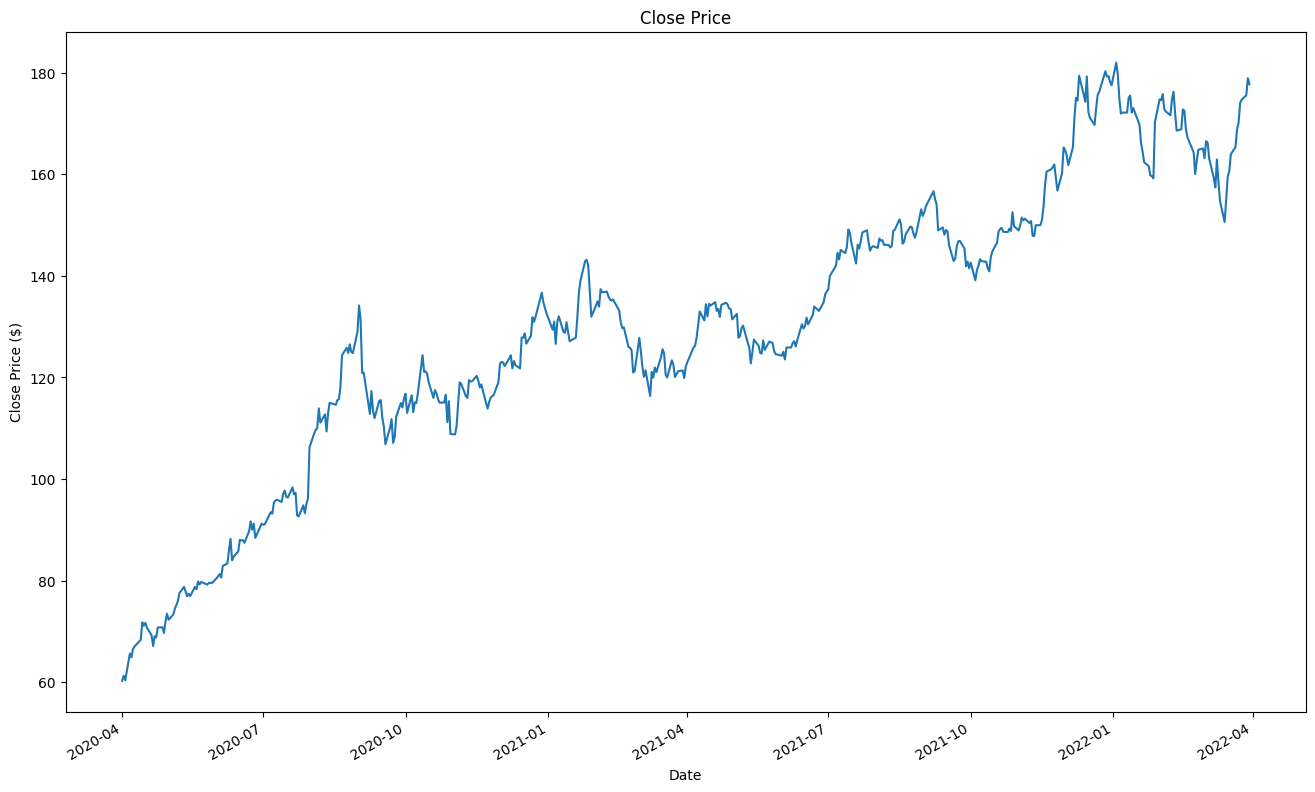

In [136]:
#Plotting close price
plt.figure(figsize=(16,10))

stock_data['Close'].plot()

plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

Text(0, 0.5, 'High Price ($)')

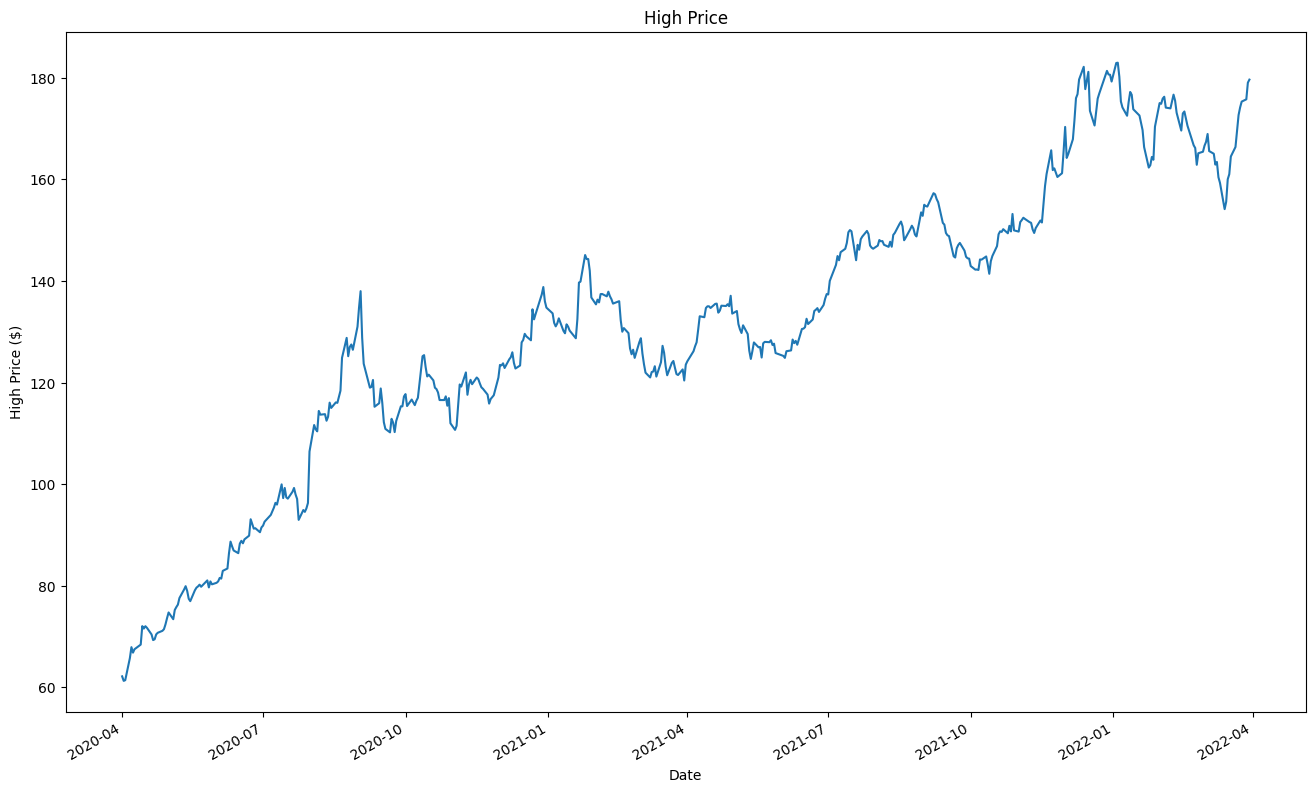

In [137]:
#Plotting high price of a particular date
plt.figure(figsize=(16,10))

stock_data['High'].plot()

plt.title("High Price")
plt.xlabel('Date')
plt.ylabel('High Price ($)')
# conclusion : both the graphs are 99% same i.e data is stock price is high throught the period

In [138]:
# displaying stock_data
stock_data

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2020-04-01,60.227501,-0.9989,0.112,0.799,0.089,61.625000,62.180000,59.782501,176218400.0
2020-04-02,61.232498,-0.9990,0.118,0.792,0.091,60.084999,61.287498,59.224998,165934000.0
2020-04-03,60.352501,-0.9985,0.105,0.814,0.082,60.700001,61.424999,59.742500,129880000.0
2020-04-06,65.617500,-0.9983,0.117,0.788,0.095,62.724998,65.777496,62.345001,201820400.0
2020-04-07,64.857498,-0.9995,0.129,0.778,0.093,67.699997,67.925003,64.750000,202887200.0
...,...,...,...,...,...,...,...,...,...
2022-03-24,174.070007,-0.9999,0.168,0.753,0.080,171.059998,174.139999,170.210007,90131400.0
2022-03-25,174.720001,-0.9999,0.160,0.774,0.066,173.880005,175.279999,172.750000,80546200.0
2022-03-28,175.600006,-0.9999,0.151,0.763,0.086,172.169998,175.729996,172.000000,90371900.0


### Data Preparation for Modelling

In [139]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 90% of data for training
train_end = int(data_to_use*0.9)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 452
Number of records in Test Data: 52


In [140]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close
compound = stock_data.iloc[start:total_data,1] #compound
negative = stock_data.iloc[start:total_data,2] #neg
neutral = stock_data.iloc[start:total_data,3] #neu
positive = stock_data.iloc[start:total_data,4] #pos
open_price = stock_data.iloc[start:total_data,5] #open
high = stock_data.iloc[start:total_data,6] #high
low = stock_data.iloc[start:total_data,7] #low
volume = stock_data.iloc[start:total_data,8] #volume

# printing High
print("High:")
high

High:


Date
2020-04-02     61.287498
2020-04-03     61.424999
2020-04-06     65.777496
2020-04-07     67.925003
2020-04-08     66.842499
                 ...    
2022-03-24    174.139999
2022-03-25    175.279999
2022-03-28    175.729996
2022-03-29    179.009995
2022-03-30    179.610001
Name: High, Length: 503, dtype: float64

In [141]:
# shifting next day close
close_price_shifted = close_price.shift(-1)

# shifting next day compound
compound_shifted = compound.shift(-1)

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

data = data.dropna()
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2020-04-02,61.232498,60.352501,-0.9990,-0.9985,165934000.0,60.084999,61.287498,59.224998
2020-04-03,60.352501,65.617500,-0.9985,-0.9983,129880000.0,60.700001,61.424999,59.742500
2020-04-06,65.617500,64.857498,-0.9983,-0.9995,201820400.0,62.724998,65.777496,62.345001
2020-04-07,64.857498,66.517502,-0.9995,-0.9994,202887200.0,67.699997,67.925003,64.750000
2020-04-08,66.517502,66.997498,-0.9994,-0.9965,168895200.0,65.684998,66.842499,65.307503
2020-04-09,66.997498,68.312500,-0.9965,-0.9995,161834800.0,67.175003,67.517502,66.175003
2020-04-13,68.312500,71.762497,-0.9995,-0.9970,131022800.0,67.077499,68.425003,66.457497
2020-04-14,71.762497,71.107498,-0.9970,-0.9966,194994800.0,70.000000,72.062500,69.512497
2020-04-15,71.107498,71.672501,-0.9966,-0.9985,131154400.0,70.599998,71.582497,70.157501


In [142]:
data

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2020-04-02,61.232498,60.352501,-0.9990,-0.9985,165934000.0,60.084999,61.287498,59.224998
2020-04-03,60.352501,65.617500,-0.9985,-0.9983,129880000.0,60.700001,61.424999,59.742500
2020-04-06,65.617500,64.857498,-0.9983,-0.9995,201820400.0,62.724998,65.777496,62.345001
2020-04-07,64.857498,66.517502,-0.9995,-0.9994,202887200.0,67.699997,67.925003,64.750000
2020-04-08,66.517502,66.997498,-0.9994,-0.9965,168895200.0,65.684998,66.842499,65.307503
...,...,...,...,...,...,...,...,...
2022-03-23,170.210007,174.070007,-0.9999,-0.9999,98062700.0,167.990005,172.639999,167.649994
2022-03-24,174.070007,174.720001,-0.9999,-0.9999,90131400.0,171.059998,174.139999,170.210007
2022-03-25,174.720001,175.600006,-0.9999,-0.9999,80546200.0,173.880005,175.279999,172.750000


### Setting the Target Variable and the Feature Dataset

In [143]:
#setting target varaible
y = data['close_price_shifted']
y

Date
2020-04-02     60.352501
2020-04-03     65.617500
2020-04-06     64.857498
2020-04-07     66.517502
2020-04-08     66.997498
                 ...    
2022-03-23    174.070007
2022-03-24    174.720001
2022-03-25    175.600006
2022-03-28    178.960007
2022-03-29    177.770004
Name: close_price_shifted, Length: 502, dtype: float64

In [144]:
# setting features dataset
x = data[['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,
2020-04-02,61.232498,-0.9990,-0.9985,165934000.0,60.084999,61.287498,59.224998
2020-04-03,60.352501,-0.9985,-0.9983,129880000.0,60.700001,61.424999,59.742500
2020-04-06,65.617500,-0.9983,-0.9995,201820400.0,62.724998,65.777496,62.345001
2020-04-07,64.857498,-0.9995,-0.9994,202887200.0,67.699997,67.925003,64.750000
2020-04-08,66.517502,-0.9994,-0.9965,168895200.0,65.684998,66.842499,65.307503
...,...,...,...,...,...,...,...
2022-03-23,170.210007,-0.9999,-0.9999,98062700.0,167.990005,172.639999,167.649994
2022-03-24,174.070007,-0.9999,-0.9999,90131400.0,171.059998,174.139999,170.210007
2022-03-25,174.720001,-0.9999,-0.9999,80546200.0,173.880005,175.279999,172.750000


#### Scaling the Target Variable and the Feature Dataset

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
# scaling the feature dataset
scaler_x =MinMaxScaler(feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = MinMaxScaler(feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

x, y

(array([[-0.98553321, -0.99909986, -0.99859979, ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -0.99859979, -0.99839976, ..., -0.98996284,
         -0.99773945, -0.99136741],
        [-0.91344555, -0.99839976, -0.99959994, ..., -0.95691381,
         -0.92618322, -0.94795441],
        ...,
        [ 0.88015545, -1.        , -1.        , ...,  0.85719532,
          0.87406748,  0.89374044],
        [ 0.89462237, -1.        , -0.99989998, ...,  0.82928709,
          0.88146556,  0.88122949],
        [ 0.94985943, -0.99989998, -1.        , ...,  0.90305598,
          0.93538962,  0.95362611]]),
 array([[-1.00000000e+00],
        [-9.13445546e-01],
        [-9.25939671e-01],
        [-8.98649877e-01],
        [-8.90758937e-01],
        [-8.69140836e-01],
        [-8.12424280e-01],
        [-8.23192199e-01],
        [-8.13903778e-01],
        [-8.29891351e-01],
        [-8.54016441e-01],
        [-8.89197159e-01],
        [-8.57427591e-01],
        [-8.61825216e-

#### Dividing the dataset into Training and Test

In [147]:
# preparing training and test dataset using sklearn test_train_split method
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.1)

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (451, 7) and y: (451, 1)
Number of rows and columns in the Test set X: (51, 7) and y: (51, 1)


In [148]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (451, 7, 1)
Shape of Test set X: (51, 7, 1)


### Model building

In [149]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

In [150]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2016)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))

model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 100)            40800     
                                                                 
 dropout_3 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 100)            80400     
                                                                 
 dropout_4 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [151]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.35, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
37/37 [==============================] - 9s 51ms/step - loss: 0.1199 - val_loss: 0.0587
Epoch 2/50
37/37 [==============================] - 1s 18ms/step - loss: 0.0385 - val_loss: 0.0147
Epoch 3/50
37/37 [==============================] - 1s 19ms/step - loss: 0.0276 - val_loss: 0.0132
Epoch 4/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0326 - val_loss: 0.0215
Epoch 5/50
37/37 [==============================] - 1s 19ms/step - loss: 0.0252 - val_loss: 0.0119
Epoch 6/50
37/37 [==============================] - 1s 19ms/step - loss: 0.0279 - val_loss: 0.0324
Epoch 7/50
37/37 [==============================] - 1s 18ms/step - loss: 0.0282 - val_loss: 0.0116
Epoch 8/50
37/37 [==============================] - 1s 18ms/step - loss: 0.0203 - val_loss: 0.0089
Epoch 9/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0171 - val_loss: 0.0068
Epoch 10/50
37/37 [==============================] - 1s 28ms/step - loss: 0.0139 - val_loss: 0.0066
Epoch 11/

In [152]:
# saving the model as a json file
model_json = model.to_json()
with open('/content/drive/MyDrive/Stock_price_analyser/data/model.json', 'w') as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights('/content/drive/MyDrive/Stock_price_analyser/data/model.h5')
print('Model is saved to the disk')


Model is saved to the disk


###predictions

In [153]:
# performing predictions
predictions = model.predict(X_test)

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:10]

2/2 [==============================] - 2s 12ms/step
Predictions:


array([[107.314705],
       [115.68822 ],
       [143.6152  ],
       [144.85196 ],
       [144.76614 ],
       [ 70.599495],
       [141.6607  ],
       [151.3232  ],
       [116.85443 ],
       [114.21833 ]], dtype=float32)

#### Model Evaluation

In [154]:
# r2_score
print("r2 score:" ,end = ' ')
metrics.r2_score(y_test,predictions)

r2 score: 

-85806.13541380825

In [155]:
# root mean squared error
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 132.9154


In [156]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

51/51 [==============================] - 0s 7ms/step - loss: 0.0025
Train Loss = 0.0027
Test Loss = 0.0025


### Plotting Predictions data against testing data to check the accuracy

In [157]:
# Unscaling the test target variable (y_test)
y_test_unscaled = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))
y_test_unscaled[0:10]

array([[113.010002],
       [124.370003],
       [145.639999],
       [146.089996],
       [145.600006],
       [ 70.792503],
       [145.110001],
       [149.800003],
       [118.029999],
       [115.970001]])

In [158]:
#Displaying 10 data points of predicted vs testing data
list_of_tuples = list(zip(predictions[0:10],y_test_unscaled[0:10]))
pd.DataFrame(list_of_tuples,columns=['Predicted data', 'testing data'])

,Predicted data,testing data
0,[107.314705],[113.010002]
1,[115.68822],[124.370003]
2,[143.6152],[145.639999]
3,[144.85196],[146.089996]
4,[144.76614],[145.600006]
5,[70.599495],[70.792503]
6,[141.6607],[145.110001]
7,[151.3232],[149.800003]
8,[116.85443],[118.029999]
9,[114.21833],[115.970001]


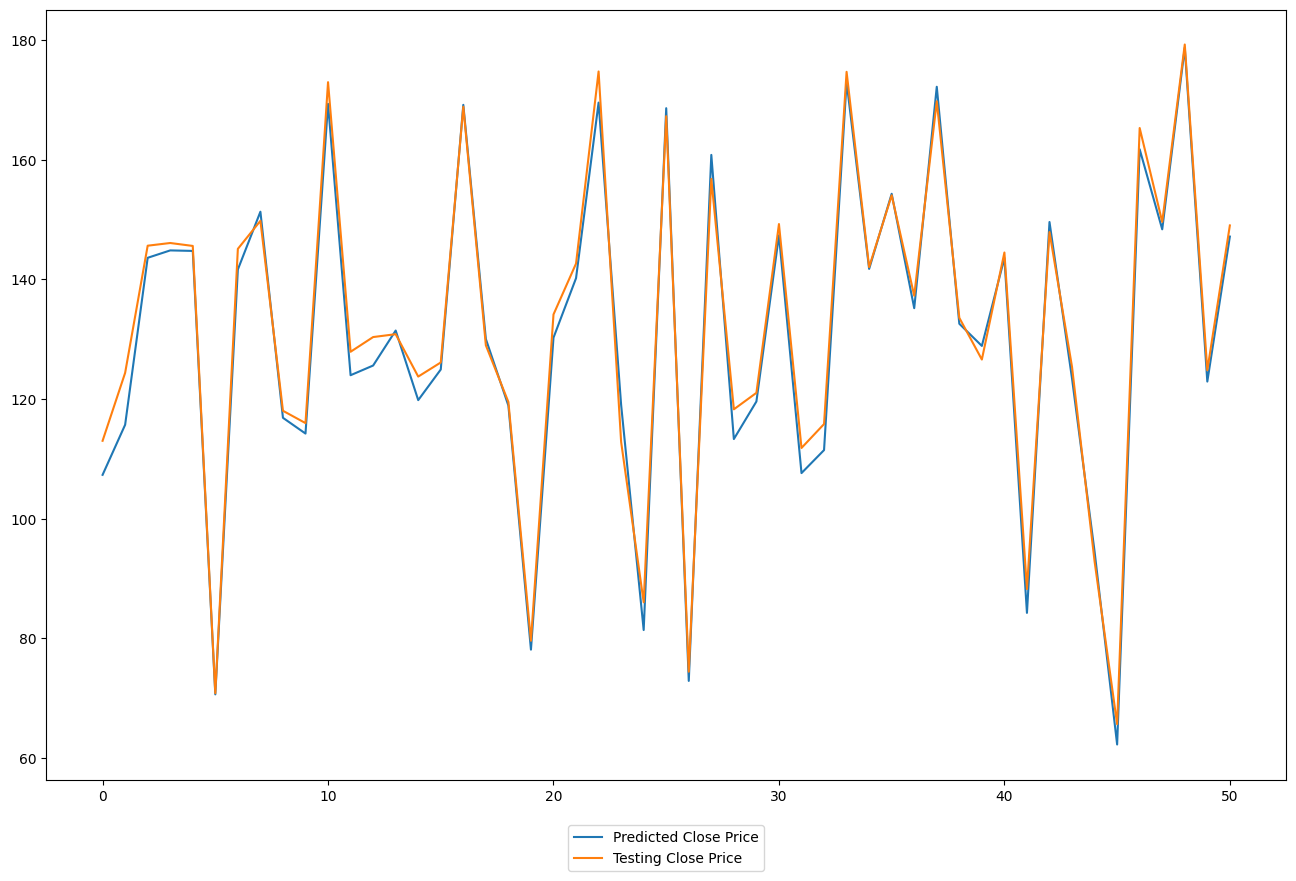

In [159]:
# plotting
plt.figure(figsize=(16,10))

plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test_unscaled], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.show()